# Clean and display the two datasets: 

In [270]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# load GDP dataset
df_GDP = pd.read_csv('GDP_CA_2001_2020.csv')
df_GDP['GeoName'] = df_GDP['GeoName'].str.rstrip(', CA')
df_GDP.drop(df_GDP.tail(4).index,inplace=True) # drop last n rows
df_GDP = df_GDP.drop(['GeoFIPS','Region','TableName','LineCode','IndustryClassification'],axis=1)
df_GDP = df_GDP[df_GDP.Description == 'Current-dollar GDP (thousands of current dollars)']
df_GDP = df_GDP.drop(df_GDP.columns[3:14],axis=1)
df_GDP = df_GDP.dropna()
df_GDP

,GeoName,Description,Unit,2012,2013,2014,2015,2016,2017,2018,2019,2020
2,California,Current-dollar GDP (thousands of current dollars),Thousands of dollars,2.113096e+09,2.220390e+09,2.335286e+09,2.473556e+09,2.569634e+09,2.730974e+09,2.895101e+09,3.052645e+09,3.007188e+09
5,Alameda,Current-dollar GDP (thousands of current dollars),Thousands of dollars,9.574948e+07,1.005214e+08,1.059368e+08,1.157918e+08,1.210535e+08,1.290289e+08,1.361689e+08,1.418886e+08,1.393132e+08
8,Alpine,Current-dollar GDP (thousands of current dollars),Thousands of dollars,9.529400e+04,9.392700e+04,1.027050e+05,1.085030e+05,1.092630e+05,1.108430e+05,1.140550e+05,1.219480e+05,1.124150e+05
11,Amador,Current-dollar GDP (thousands of current dollars),Thousands of dollars,1.365613e+06,1.440258e+06,1.488434e+06,1.551133e+06,1.617941e+06,1.732487e+06,1.786296e+06,1.870309e+06,1.848108e+06
14,Butte,Current-dollar GDP (thousands of current dollars),Thousands of dollars,7.363012e+06,7.602095e+06,7.634930e+06,8.041364e+06,8.649007e+06,9.189787e+06,9.500527e+06,9.893227e+06,9.461454e+06
17,Calaveras,Current-dollar GDP (thousands of current dollars),Thousands of dollars,1.050964e+06,1.044218e+06,1.172626e+06,1.246769e+06,1.362303e+06,1.442782e+06,1.415632e+06,1.661687e+06,1.579783e+06
20,Colusa,Current-dollar GDP (thousands of current dollars),Thousands of dollars,1.197262e+06,1.322530e+06,1.128142e+06,1.378865e+06,1.344228e+06,1.272562e+06,1.524227e+06,1.372137e+06,1.629003e+06
23,Contra Costa,Current-dollar GDP (thousands of current dollars),Thousands of dollars,6.220741e+07,6.304071e+07,6.828270e+07,6.888313e+07,6.633854e+07,7.209355e+07,8.092180e+07,8.259453e+07,7.748475e+07
26,Del Norte,Current-dollar GDP (thousands of current dollars),Thousands of dollars,6.943710e+05,7.020370e+05,7.137360e+05,7.376410e+05,7.684460e+05,7.622530e+05,8.037490e+05,8.184160e+05,9.431730e+05
29,El Dorado,Current-dollar GDP (thousands of current dollars),Thousands of dollars,5.984844e+06,6.197638e+06,6.548820e+06,6.919116e+06,7.565475e+06,8.051829e+06,8.501615e+06,8.669087e+06,8.294970e+06


In [271]:
# load EHR dataset
df_EHR = pd.read_csv('EHR_Incentive_Program_Payments_-_Providers.csv')
df_EHR = df_EHR.drop(df_EHR.columns[0:9], axis=1)
df_EHR = df_EHR.drop(df_EHR.columns[1:3], axis=1)
df_EHR = df_EHR.drop(['Payment__1','Payment_Cr','Payee_Name','Payee_NPI','total_rece','Latitude','Longitude','Program_Ye'],axis=1)
df_EHR = df_EHR.dropna()
df_EHR

,Business_1,Payment_Ye,total_paym
0,Sacramento,2019,38250.0
1,Alameda,2014,21250.0
2,Contra Costa,2016,21250.0
3,San Bernardino,2015,29750.0
4,Orange,2014,21250.0
...,...,...,...
25686,Los Angeles,2012,21250.0
25687,Los Angeles,2016,29750.0
25688,San Francisco,2017,21250.0
25689,Los Angeles,2013,21250.0


# Aggregate the datasets

In [272]:
df_GDP = df_GDP.groupby(['GeoName','Description','Unit']).sum().reset_index()
df_GDP.head(5)

,GeoName,Description,Unit,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Alameda,Current-dollar GDP (thousands of current dollars),Thousands of dollars,95749481.0,100521444.0,105936777.0,115791781.0,121053460.0,129028899.0,136168877.0,141888634.0,139313240.0
1,Alpine,Current-dollar GDP (thousands of current dollars),Thousands of dollars,95294.0,93927.0,102705.0,108503.0,109263.0,110843.0,114055.0,121948.0,112415.0
2,Amador,Current-dollar GDP (thousands of current dollars),Thousands of dollars,1365613.0,1440258.0,1488434.0,1551133.0,1617941.0,1732487.0,1786296.0,1870309.0,1848108.0
3,Butte,Current-dollar GDP (thousands of current dollars),Thousands of dollars,7363012.0,7602095.0,7634930.0,8041364.0,8649007.0,9189787.0,9500527.0,9893227.0,9461454.0
4,Calaveras,Current-dollar GDP (thousands of current dollars),Thousands of dollars,1050964.0,1044218.0,1172626.0,1246769.0,1362303.0,1442782.0,1415632.0,1661687.0,1579783.0


In [273]:
df_EHR = df_EHR.groupby(['Business_1','Payment_Ye']).sum().reset_index()
df_EHR.tail()

,Business_1,Payment_Ye,total_paym
454,Yuba,2014,255000.0
455,Yuba,2015,76500.0
456,Yuba,2017,552500.0
457,Yuba,2018,187000.0
458,Yuba,2019,63750.0


# Reshape DataFrame from wide format to long format

In [274]:
df_GDP = pd.melt(df_GDP, id_vars=['GeoName','Description','Unit'], value_vars=year_list) #Pandas.melt() unpivots a DataFrame from wide format to long format
df_GDP.head()

,GeoName,Description,Unit,variable,value
0,Alameda,Current-dollar GDP (thousands of current dollars),Thousands of dollars,2012,95749481.0
1,Alpine,Current-dollar GDP (thousands of current dollars),Thousands of dollars,2012,95294.0
2,Amador,Current-dollar GDP (thousands of current dollars),Thousands of dollars,2012,1365613.0
3,Butte,Current-dollar GDP (thousands of current dollars),Thousands of dollars,2012,7363012.0
4,Calaveras,Current-dollar GDP (thousands of current dollars),Thousands of dollars,2012,1050964.0


# Combine the two datasets 

In [275]:
df_GDP["variable"]

0      2012
1      2012
2      2012
3      2012
4      2012
       ... 
526    2020
527    2020
528    2020
529    2020
530    2020
Name: variable, Length: 531, dtype: object

In [276]:
df_EHR['Payment_Ye']

0      2012
1      2013
2      2014
3      2015
4      2016
       ... 
454    2014
455    2015
456    2017
457    2018
458    2019
Name: Payment_Ye, Length: 459, dtype: int64

In [277]:
df_EHR['Payment_Ye'] = df_EHR['Payment_Ye'].apply(lambda x: str(x))

In [278]:
df = df_GDP.merge(df_EHR, how='inner', left_on=['GeoName', 'variable'], right_on=['Business_1', 'Payment_Ye'])
df.head()

,GeoName,Description,Unit,variable,value,Business_1,Payment_Ye,total_paym
0,Alameda,Current-dollar GDP (thousands of current dollars),Thousands of dollars,2012,95749481.0,Alameda,2012,5581667.0
1,Amador,Current-dollar GDP (thousands of current dollars),Thousands of dollars,2012,1365613.0,Amador,2012,63750.0
2,Butte,Current-dollar GDP (thousands of current dollars),Thousands of dollars,2012,7363012.0,Butte,2012,637500.0
3,Colusa,Current-dollar GDP (thousands of current dollars),Thousands of dollars,2012,1197262.0,Colusa,2012,63750.0
4,Contra Costa,Current-dollar GDP (thousands of current dollars),Thousands of dollars,2012,62207407.0,Contra Costa,2012,297500.0


# Linear regression of two dataset
## The lplot shows us how well we are able to fit the relationship between the GDP value and the total payment of EHR.

In [279]:
# Training data
X = df.loc[:,["value"]]  # features
y = df.loc[:,'total_paym']  # target
# Train the model
model = LinearRegression()
model.fit(X, y)

# Store the fitted values as a time series with the same time index as
# the training data
y_pred = pd.Series(model.predict(X), index=X.index)

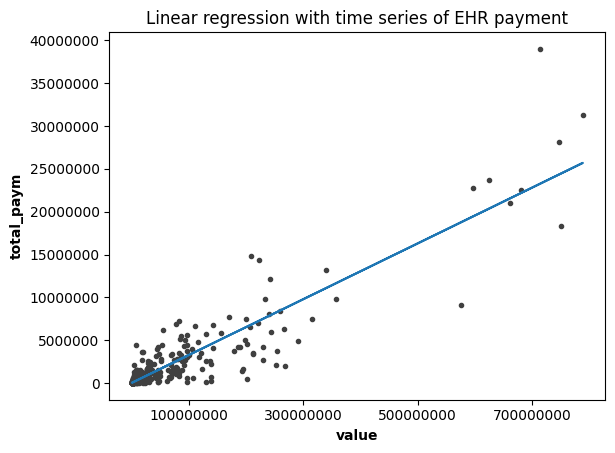

In [280]:
fig, ax = plt.subplots()
ax.plot(X['value'], y, '.', color='0.25')
ax.plot(X['value'], y_pred)
ax.ticklabel_format(style='plain')
ax.set_xticks([100000000,300000000,500000000,700000000])
ax.set_aspect('15')
ax.set_ylabel('total_paym',fontweight='bold')
ax.set_xlabel('value',fontweight='bold')
ax.set_title('Linear regression with time series of EHR payment')
plt.show()

# Compare Algorithms